In [1]:
import lib_data as data
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
import pickle
import os
import julian
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
nasa_julian = 98
cnes_julian = 90

#### Regional data extraction

In [2]:
extract = False
if extract:
    data.region_ex('Kuroshio',pres_max =100,fe = 0.1)

# Temporal and Spatial Data Distribtion

In [2]:
# load the Gulf Stream region
ft_gs = pd.read_pickle("data/GS-all/feature_train_gs.pkl")

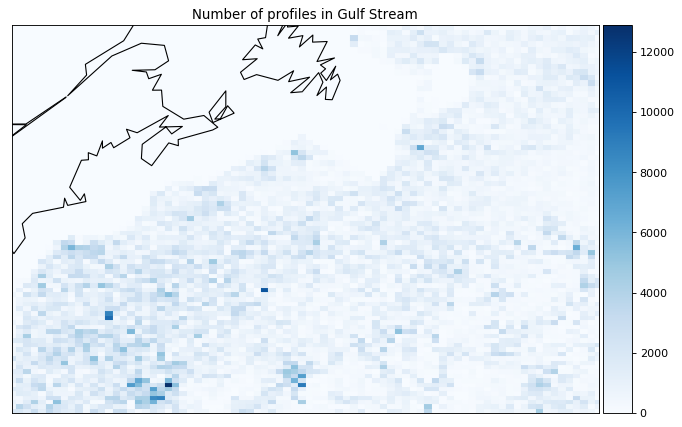

In [3]:
data.spatial_dist(ft_gs,80,80, "Gulf Stream",30,50,-75,-35)

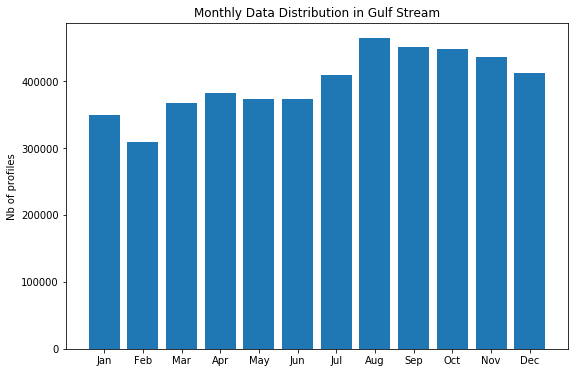

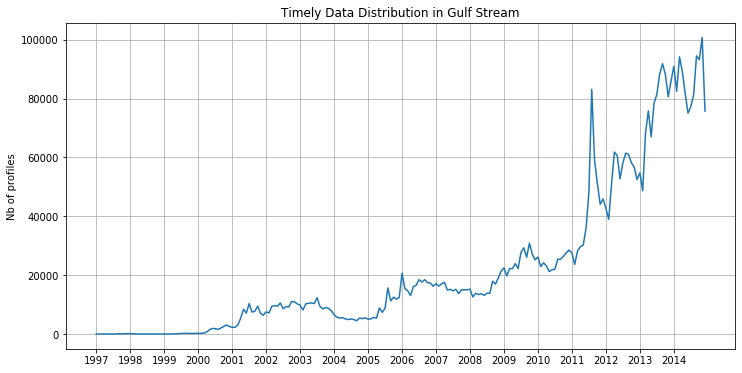

In [4]:
data.temporal_dist(ft_gs, "Gulf Stream")

https://rabernat.github.io/research_computing/intro-to-basemap.html

In [96]:
# load the Gulf Stream region
ft_ks = pd.read_pickle("data/KS-all/feature_train_ks.pkl")

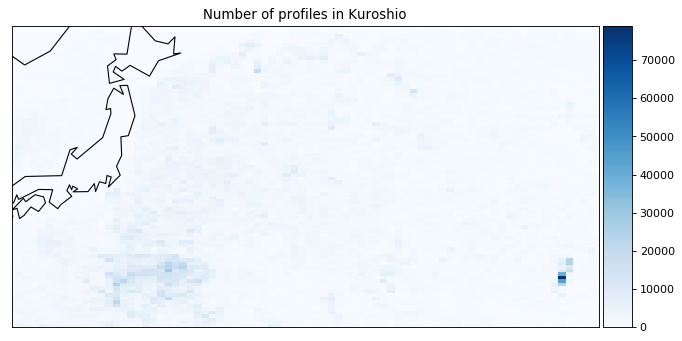

In [116]:
data.spatial_dist(ft_ks,80,80, "Kuroshio",25,45,132,180)

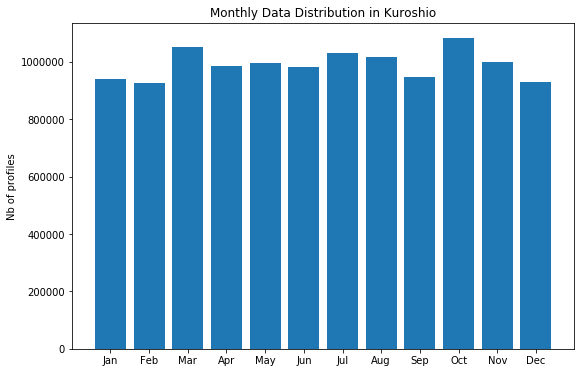

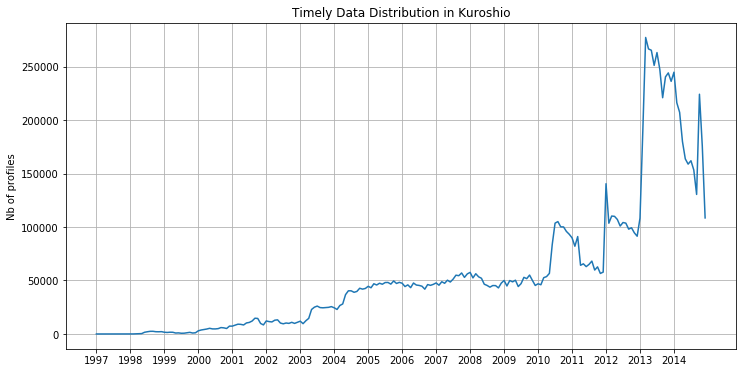

In [113]:
data.temporal_dist(ft_ks, "Kuroshio")

# Depth Data Distribution

In [201]:
profiles = pd.read_pickle('feature_train_gs.pkl')[:,-1]
temps =  pd.read_pickle('y_train_gs.pkl')[:,0]
pres =  pd.read_pickle('x_train_gs.pkl')[:,-1]
lat =  pd.read_pickle('feature_train_gs.pkl')[:,0]
lon =  pd.read_pickle('feature_train_gs.pkl')[:,1]
juld = pd.read_pickle('feature_train_gs.pkl')[:,2]

In [202]:
profile_indexes = np.unique(profiles)[np.random.randint(0, np.unique(profiles).shape[0],1)]
profile_indexes

array([4551.])

In [199]:
mask = [np.where(profiles == p) for p in list(profile_indexes)]

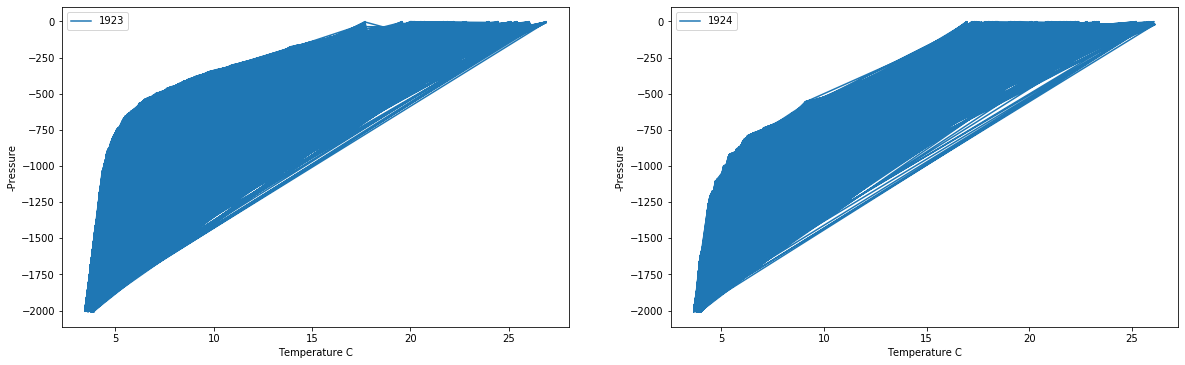

In [194]:
for i,p in enumerate(list(profile_indexes)):
    
    # extract infos
    mask_plot = mask[i][0]
    temp_plot = temps[mask_plot]
    lat_plot = lat[mask_plot]
    lon_plot = lon[mask_plot]
    juld_plot = juld[mask_plot]
    pres_plot = -1*pres[mask_plot]
    
    # plot profile for each year
    year_plot = np.asarray([julian.from_jd(d, fmt='mjd').year for d in list(juld_plot)])
    year_unique = np.unique(year_plot)
    
    plot_index = 0
    plt.figure(figsize=(20,20))
    for y in list(year_unique):
        
        mask_year = np.where(year_plot == y)
        temp_year_plot = temp_plot[mask_year]
        pres_year_plot = pres_plot[mask_year]
        plt.subplot(321+plot_index);
        plt.plot(temp_year_plot,pres_year_plot,label = str(y));
        plt.xlabel("Temperature C");
        plt.ylabel("-Pressure");
        plt.legend();
        plot_index = plot_index + 1

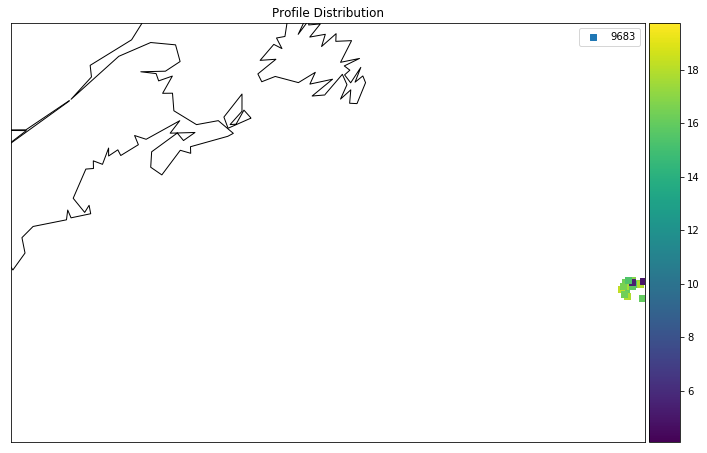

In [200]:
for i,p in enumerate(list(profile_indexes)):
    
    plt.figure(figsize=(12,8))
    
    # extract infos
    mask_plot = mask[i][0]
    temp_plot = temps[mask_plot]
    lat_plot = lat[mask_plot]
    lon_plot = lon[mask_plot]
    juld_plot = juld[mask_plot]
    ax = plt.gca()
    plt.title("Profile Distribution")
    map = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,llcrnrlon=-75,urcrnrlon=-35,resolution='c')
    map.drawcoastlines()
    x, y = map(lon_plot, lat_plot)
    map.scatter(x, y, c = temp_plot, marker = 's', label =str(int(profile_indexes[0])))
    plt.legend()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax)
    plt.show()